In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = "chesterish")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
from sklearn import linear_model # scikit learn 패키지에서 linear_model이라는 모듈을 불러들임
import numpy as np
import pandas as pd

# matplotlib에는 사전에 정의한 많은 스타일이 있다.
# ggplot도 그 중 하나임
# R에서 사용하는 ggplot을 흉내내는 스타일을 사용하겠다고 선언
mpl.style.use('ggplot')

In [15]:
# 2차원 배열을 만들어 'data'라는 변수에 할당
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


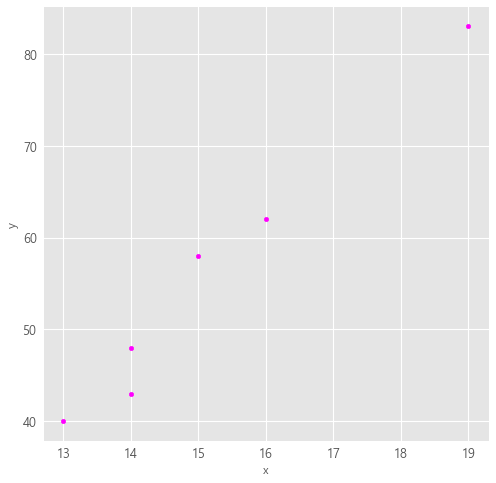

In [16]:
data.plot(kind = "scatter",  # 산점도를 그리시오
          x = 'x',           # 가로축은 x라고 라벨을 붙임
          y = 'y',           # 세로축은 y라고 라벨을 붙임
          figsize = (8,8),   # 가로 8인치, 세로 8인치 크기의 박스를 설정
          color = "magenta")    # 산점도 상의 점 색상을 파랑색으로 지정

In [22]:
# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# Linearregression()의 fit()이라는 함수를 이용하여 선형회귀 모델 훈련 실행
# 이 때 독립변수는 x, 종속변수는 y
linear_regression.fit(X = pd.DataFrame(data['x']), y = data['y'])

# 선형 회귀식의 세로축 절편 'linear_regression.intercept_'를 구하여 출력한다.
# 선형 회귀식의 기울기 'linear_regression.coef_'를 구하여 출력한다.
print('a value =', linear_regression.intercept_)
print('b value =', linear_regression.coef_)

a value = -55.48175182481753
b value = [7.32846715]


In [24]:
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
prediction = linear_regression.predict(X = pd.DataFrame(data['x']))

# 실제 y값과 예측한 y값을 비교하여 잔차(residuals)를 구한다.
residuals = data['y'] - prediction
print(residuals)

# 변수의 갯수(6개), 잔차의 평균값, 잔차의 표준편차, 최소값, 25% 값, 50% 값, 75% 값, 최대값을 출력한다.
residuals.describe()

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [28]:
# 잔차를 제곱하여 전체를 합침. 결과값을 SSE라는 변수에 할당
SSE = (residuals**2).sum()
print("SSE =", SSE)

# y값의 표준편차를 제곱한 것을 모두 합침. 그 결과값을 SST라는 변수에 할당
SST = ((data['y']-data['y'].mean())**2).sum()
print("SST =", SST)

# 결정계수 R을 구함
R_squared = 1 - (SSE/SST)
print("R_squared =", R_squared)

SSE = 31.03649635036502
SST = 1257.3333333333333
R_squared = 0.9753156179610034


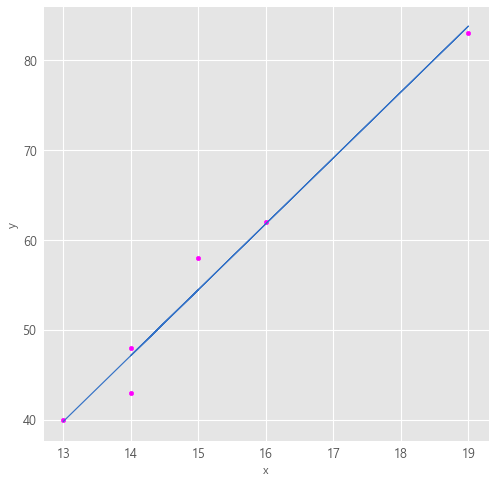

In [29]:
data.plot(kind = "scatter",  
          x = 'x',           
          y = 'y',           
          figsize = (8,8),
          color = "magenta")

# Plot regression line
plt.plot(data['x'], prediction, c = 'b')

In [30]:
# sklearn.metrics라는 패키지로부터 mean_squared_error 모듈을 불러들임
from sklearn.metrics import mean_squared_error

# 결정계수 R값을 구함
print('score =', linear_regression.score(X = pd.DataFrame(data['x']), y = data['y']))

# 실제값(data[y])과 회귀식 값(prediction)의 차이의 제곱을 구함
print('Mean_Squared_Error =', mean_squared_error(prediction, data['y']))

# Mean squared error의 제곱근 값을 구함
print('RMSE =', mean_squared_error(prediction, data['y'])**0.5)

score = 0.9753156179610034
Mean_Squared_Error = 5.172749391727503
RMSE = 2.2743679103714736
